# Graded Challenge 3
- Muhammad Nafisa Fakhri
- FTDS Batch 013

Query data dari SQL big query public data waste and diversion of Austin Smart City
```
SELECT load_time,load_type,load_weight,dropoff_site
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
LIMIT 150000
```

Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data_mentah = pd.read_csv("h8dsft_P0GC3_mnfakhri.csv")
data_mentah.head()

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


In [3]:
data_mentah.tail()

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00 UTC,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


In [4]:
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     150000 non-null  object 
 1   load_type     150000 non-null  object 
 2   load_weight   144934 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

Yang pertama adalah mengubah format data load time menjdi format date dengan menggunakan fungsi pandas.

In [5]:
data_mentah["load_time"] = pd.to_datetime(data_mentah["load_time"])
data_mentah.sort_values(by="load_time",ascending=True,inplace=True)
data_mentah.reset_index(drop=True,inplace=True)
data_mentah

,load_time,load_type,load_weight,dropoff_site
0,2000-01-26 12:39:00+00:00,RECYCLING - PAPER,2940.0,MRF
1,2004-08-30 01:26:00+00:00,RECYCLING - PAPER,8580.0,MRF
2,2004-08-30 01:40:00+00:00,RECYCLING - COMINGLE,4580.0,MRF
3,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2760.0,MRF
4,2004-10-01 01:00:00+00:00,RECYCLING - COMINGLE,3420.0,MRF
...,...,...,...,...
149995,2021-07-11 07:05:24+00:00,RECYCLING - SINGLE STREAM,NaN,TDS - MRF
149996,2021-07-11 07:05:51+00:00,RECYCLING - SINGLE STREAM,0.0,TDS - MRF
149997,2021-07-11 07:07:01+00:00,GARBAGE COLLECTIONS,NaN,ZILKER
149998,2021-07-11 07:07:01+00:00,GARBAGE COLLECTIONS,NaN,ZILKER


In [6]:
data_mentah.query("load_weight == 0")

,load_time,load_type,load_weight,dropoff_site
1989,2004-11-17 12:00:00+00:00,RECYCLING - PAPER,0.0,MRF
2634,2004-12-02 01:37:00+00:00,RECYCLING - COMINGLE,0.0,MRF
3470,2004-12-21 10:13:00+00:00,RECYCLING - PAPER,0.0,MRF
3839,2004-12-30 02:19:00+00:00,RECYCLING - PAPER,0.0,MRF
3843,2004-12-30 02:26:00+00:00,RECYCLING - COMINGLE,0.0,MRF
...,...,...,...,...
138953,2019-08-07 12:00:00+00:00,GARBAGE COLLECTIONS,0.0,MRF
138962,2019-08-09 12:00:00+00:00,GARBAGE COLLECTIONS,0.0,MRF
145443,2020-10-13 12:00:00+00:00,RECYCLING - SINGLE STREAM,0.0,TDS - MRF
149993,2021-07-11 07:03:07+00:00,GARBAGE COLLECTIONS,0.0,MRF


In [7]:
data_mentah.isna().sum()

load_time          0
load_type          0
load_weight     5066
dropoff_site       0
dtype: int64

Terdapat missing value pada kolom load weight sebesar 5066 data, maka dari itu diperlukan cleaning data agar data tersebut bisa diolah.

Kita melakukan pembuatan grafik dari data load weight, garis nilai median data load weight dan garis nilai rata-rata data load weight dengan tujuan untuk menentukan nilai yang akan mengisi missing value dari data load weight.

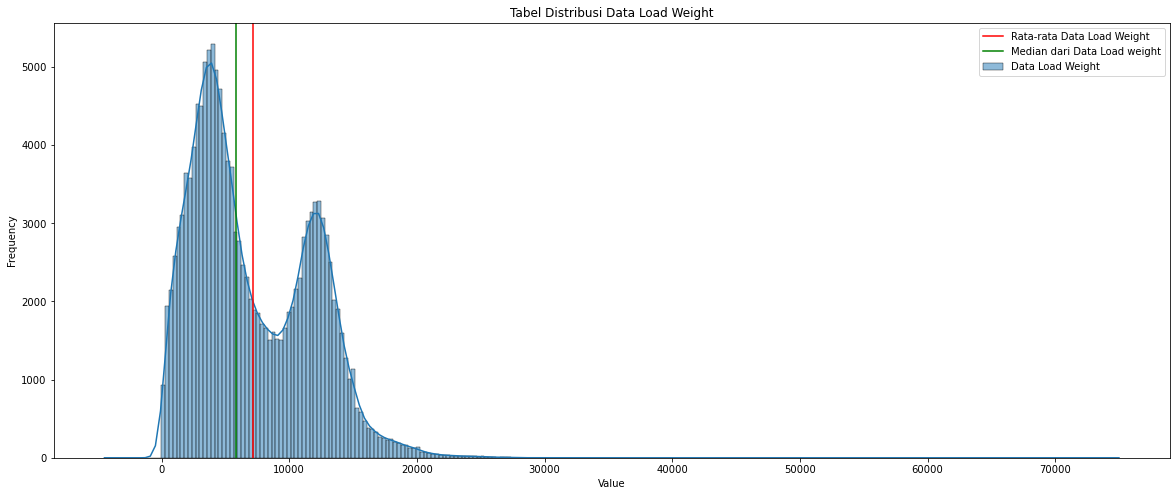

In [8]:
plt.figure(figsize=(20,8))
sns.histplot(data_mentah["load_weight"],kde=True,label="Data Load Weight")
plt.axvline(data_mentah["load_weight"].mean(),color="red",label="Rata-rata Data Load Weight")
plt.axvline(data_mentah["load_weight"].median(),color="green",label="Median dari Data Load weight")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Tabel Distribusi Data Load Weight")
plt.legend()
plt.show()

Berdasarkan grafik tersebut terlihat bahwa garis dari median data load weight lebih mendekati data puncak tertinggi dari data load weight dibandingkan dengan garis rata-rata dari data load weight. maka dari itu untuk mengisi missing value dari data load weight kita menggunakan nilai median dari data tersebut.

In [9]:
print(data_mentah["load_weight"].median())

5800.0


2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

In [10]:
data_mentah["load_weight"].fillna(data_mentah["load_weight"].median(),inplace=True)
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   load_time     150000 non-null  datetime64[ns, UTC]
 1   load_type     150000 non-null  object             
 2   load_weight   150000 non-null  float64            
 3   dropoff_site  150000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 4.6+ MB


Berdasarkan hasil generate function dari data tesebut diperoleh tipe data dari ke-empat kolom tersebut yaitu kolom load time dengan tipe data datetime, kolom load type dengan tipe data object, kolom load weight dengan tipe data float dan kolom drop off site dengan tipe data object. Hal yang kita bisa dapat disini adalah jika kita ingin melakukan pengolahan data berupa angka, maka kolom load weight saja yang dapat diolah, sedangkan untuk kolom load type dan drop off site yang bertipe object hanya bisa kita lihat untuk pemilihan data yang akan diolah (query).

In [11]:
print(data_mentah["load_type"].unique())
print(data_mentah["load_type"].unique().shape)

['RECYCLING - PAPER' 'RECYCLING - COMINGLE' 'SWEEPING'
 'RECYCLING - SINGLE STREAM' 'YARD TRIMMING' 'GARBAGE COLLECTIONS'
 'MIXED LITTER' 'RECYCLED METAL' 'BRUSH' 'YARD TRIMMING - X-MAS TREES'
 'RECYCLING - PLASTIC BAGS' 'LITTER' 'BULK' 'DEAD ANIMAL' 'TIRES' 'MULCH'
 'ORGANICS' 'CONTAMINATED RECYCLING']
(18,)


Dari informasi tersebut terdapat 18 jenis sampah yang terdapat pada tempat pembuangan sampah di kota Austin, yaitu "RECYCLING - SINGLE STREAM", "RECYCLING - PAPER", "RECYCLING - COMINGLE", "SWEEPING", "BRUSH", "TIRES","BULK", "RECYCLED METAL", "YARD TRIMMING", "MIXED LITTER", "GARBAGE COLLECTIONS", "ORGANICS", "RECYCLING - PLASTIC BAGS", "MULCH", "LITTER", "YARD TRIMMING - X-MAS TREES", "CONTAMINATED RECYCLING" dan "DEAD ANIMAL".

In [12]:
print(data_mentah["dropoff_site"].unique())
print(data_mentah["dropoff_site"].unique().shape)

['MRF' 'WILCAB' 'ELMONT' 'KRAMER' 'CLARKSON' 'ZILKER' 'PARK BEND'
 'TDS - MRF']
(8,)


Terdapat 8 tempat dropoff dari sampah tersebut yaitu "MRF", "ELMONT", "KRAMER", "WILCAB", "ZILKER", "CLARKSON", "PARK BEND", "TDS - MRF"

In [13]:
print("Data pertama yang tercatat adalah pada:",data_mentah.loc[0,"load_time"])
print("Data terakhir yang tercatat adalah pada:",data_mentah.loc[149999,"load_time"])

Data pertama yang tercatat adalah pada: 2000-01-26 12:39:00+00:00
Data terakhir yang tercatat adalah pada: 2021-07-11 07:07:05+00:00


Pengambilan data tersebut dimulai dari 2000-01-26 dan yang terakhir tercatat adalah 2021-07-11

In [14]:
print(data_mentah["load_weight"].mean())
print(data_mentah["load_weight"].median())
print(data_mentah["load_weight"].mode())

7088.65162
5800.0
0    5800.0
Name: load_weight, dtype: float64


- Rata-rata dari data load weight keselurhan adalah 7088.65162
- Median dari data load weight keseluruhan adalah 5800.0
- Modus dari data load weight keseluruhan adalah 5800.0

In [15]:
list_dropoff = data_mentah["dropoff_site"].unique()
for a in list_dropoff:
    jumlah_data_dropoff = data_mentah.loc[data_mentah["dropoff_site"]==a,"load_weight"].count()
    print(f"Jumlah data load weight pada dropoff site {a} adalah: {jumlah_data_dropoff} data")
    print(" ")

Jumlah data load weight pada dropoff site MRF adalah: 89625 data
 
Jumlah data load weight pada dropoff site WILCAB adalah: 2754 data
 
Jumlah data load weight pada dropoff site ELMONT adalah: 1462 data
 
Jumlah data load weight pada dropoff site KRAMER adalah: 316 data
 
Jumlah data load weight pada dropoff site CLARKSON adalah: 386 data
 
Jumlah data load weight pada dropoff site ZILKER adalah: 1024 data
 
Jumlah data load weight pada dropoff site PARK BEND adalah: 396 data
 
Jumlah data load weight pada dropoff site TDS - MRF adalah: 54037 data
 


Disini kita mendapatkan informasi bahwa jumlah data load weight terbanyak terdapat pada drop off site MRF dengan 89625 data, sedangkan terkecil terdapat pada drop off site KRAMER dengan 316 data. Data ini memiliki arti bahwa drop off site yang sering dijadikan tempat pembuangan sampah adalah MRF dan yang paling jarang adalah KREMER.

3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota?

Sekarang mari kita analisis load weight dari kota Austin dengan meninjau nilai rata-rata, median dan modus dari load weight tersebut.

In [16]:
def central_tendency(b):
    rata2 = data_mentah.loc[data_mentah["dropoff_site"]==b,"load_weight"].mean()
    median = data_mentah.loc[data_mentah["dropoff_site"]==b,"load_weight"].median()
    modus = data_mentah.loc[data_mentah["dropoff_site"]==b,"load_weight"].mode()[0]
    print(f"Nilai dari rata-rata dari drop off site {b} adalah:",rata2)
    print(f"Nilai dari median dari drop off site {b} adalah:",median)
    print(f"Nilai dari modus dari drop off site {b} adalah:",modus)
    print(" ")

for c in list_dropoff:
    central_tendency(c)

Nilai dari rata-rata dari drop off site MRF adalah: 5305.141835425384
Nilai dari median dari drop off site MRF adalah: 4260.0
Nilai dari modus dari drop off site MRF adalah: 3460.0
 
Nilai dari rata-rata dari drop off site WILCAB adalah: 5817.0660856935365
Nilai dari median dari drop off site WILCAB adalah: 5800.0
Nilai dari modus dari drop off site WILCAB adalah: 5800.0
 
Nilai dari rata-rata dari drop off site ELMONT adalah: 5832.501367989056
Nilai dari median dari drop off site ELMONT adalah: 5800.0
Nilai dari modus dari drop off site ELMONT adalah: 5800.0
 
Nilai dari rata-rata dari drop off site KRAMER adalah: 5855.632911392405
Nilai dari median dari drop off site KRAMER adalah: 5800.0
Nilai dari modus dari drop off site KRAMER adalah: 5800.0
 
Nilai dari rata-rata dari drop off site CLARKSON adalah: 5833.264248704663
Nilai dari median dari drop off site CLARKSON adalah: 5800.0
Nilai dari modus dari drop off site CLARKSON adalah: 5800.0
 
Nilai dari rata-rata dari drop off site ZI

Disini kita mendapat beberapa informasi yang menarik diantaranya: 
- Nilai rata-rata tertinggi terdapat pada site TDS-MRF dengan nilai 10116.689435016748.
- Nilai rata-rata terendah terdapat pada site MDF dengan nilai 5305.141835425384.
- Nilai median tertinggi terdapat pada site TDS-MRF dengan nilai 10960.0.
- Nilai median terendah terdapat pada site MRF dengan nilai 4260.0.
- Nilai modus tertinggi terdapat pada site ZILKER dengna nilai 15000.0.
- Nilai modus terendah terdapat pada site MRF dengan nilai 3460.0.

Dari eksplorasi data tersebut terdapat beberapa hal yang menarik perhatian: 
- Drop off site MRF memiliki data terbanyak tetapi memiliki nilai central of tendency terkecil diantara site lainnya.
- Drop off site TDS-MRF miliki data terbanyak kedua tetapi memiliki nilai central of tendency rata-rata dan median tertinggi.
- Drop off site WILCAB, ELMONT, KRAMER dan CLARKSON memiliki kemiripan nilai rata-rata walaupun tidak sama persis, tetapi keempat site tersebut memiliki nilai median dan modus yang sama.

4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

Mari kita lihat persebaran data, skewness dan kurtosis dari site MRF karena memiliki jumlah data terbanyak tetapi memiliki 
central of tendency terendah dan TDS-MRF karena memiliki nilai rata-rata dan median tertinggi.

In [17]:
data_lw_mrf = data_mentah.loc[data_mentah["dropoff_site"]=="MRF","load_weight"].reset_index(drop=True)
data_lw_tds_mrf = data_mentah.loc[data_mentah["dropoff_site"]=="TDS - MRF","load_weight"].reset_index(drop=True)

Nilai dari Skewness data load weight dari dropoff site MRF adalah: 1.0010205810425372
Nilai dari Kurtosis data load weight dari dropoff site MRF adalah: 0.16851853454753618


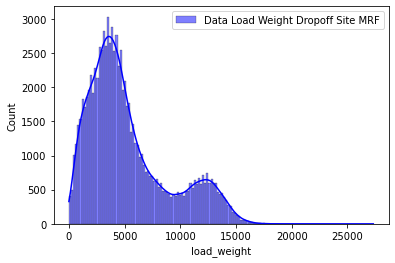

In [18]:
# Persebaran data, skewness dan kurtosis dari load weight dropoff site MRF
print("Nilai dari Skewness data load weight dari dropoff site MRF adalah:",data_lw_mrf.skew())
print("Nilai dari Kurtosis data load weight dari dropoff site MRF adalah:",data_lw_mrf.kurt())
sns.histplot(data_lw_mrf,kde=True,label="Data Load Weight Dropoff Site MRF",color="blue")
plt.legend()

Terlihat dari grafik persebaran data bahwa data tersebut tidak mengikuti distribusi normal dengan tipe skew right dan grafik yang terdapat dua puncak dari data tersebut sehingga nilai kurtosis disini menjadi tidak pasti.

Nilai dari Skewness data load weight dari dropoff site TDS - MRF adalah: -0.035588393699020365
Nilai dari Kurtosis data load weight dari dropoff site TDS - MRF adalah: 0.05658712749032979


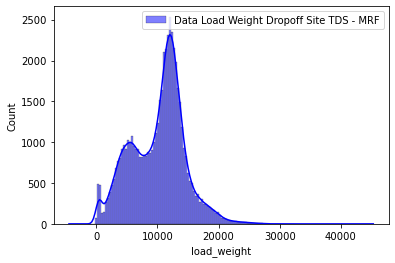

In [19]:
# Persebaran data, skewness dan kurtosis dari load weight dropoff site TDS - MRF
print("Nilai dari Skewness data load weight dari dropoff site TDS - MRF adalah:",data_lw_tds_mrf.skew())
print("Nilai dari Kurtosis data load weight dari dropoff site TDS - MRF adalah:",data_lw_tds_mrf.kurt())
sns.histplot(data_lw_tds_mrf,kde=True,label="Data Load Weight Dropoff Site TDS - MRF",color="blue")
plt.legend()

Terlihat dari grafik persebaran data bahwa data tersebut tidak mengikuti distribusi normal dengan tipe skew left dan grafik yang terdapat dua puncak dari data tersebut sehingga nilai kurtosis disini menjadi tidak pasti.

Maksud dari nilai skewness dan kurtosis disini adalah untuk melihat persebaran data yang terdapat pada drop off site tersebut. Terlihat dari grafik bahwa data memiliki kecenderungan terpusat di tengah sehingga mengartikan bahwa persebaran data tersebut tidak menyebar dengan baik.

5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

Mari kita lihat data load weight dari site MRF dan TDS-MRF apakah dalam data tersebut terdapat data yang diluar dari outlier.

In [20]:
def hapus_outier(e):
    iqr_data = e.quantile([0.75])[0.75] - e.quantile([0.25])[0.25]
    batas_atas = e.quantile([0.75])[0.75] + 1.5*iqr_data
    batas_bawah = e.quantile([0.25])[0.25] - 1.5*iqr_data
    for d in range(0,len(e)):
        if e[d] > batas_atas or e[d] < batas_bawah:
            del e[d]
        else:
            continue
    e.reset_index(drop=True,inplace=True)
    plt.figure(figsize=(10,10))
    e.plot(kind="box",title="Boxplot Data Setelah Hapus Outlier")

<AxesSubplot:title={'center':'Box plot Data MRF'}>

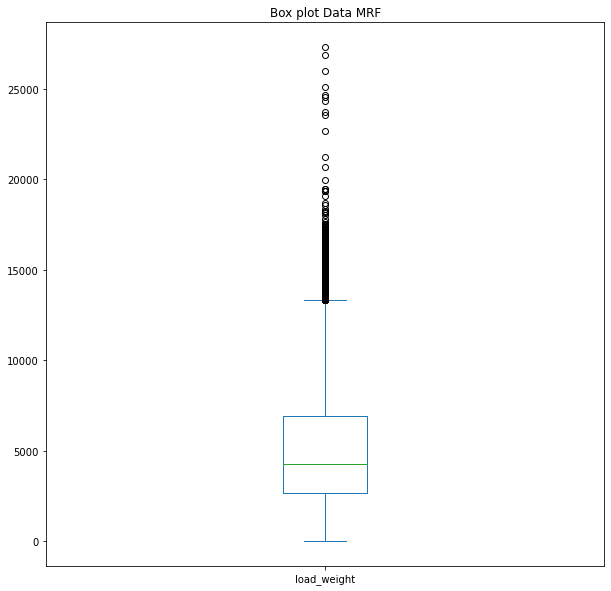

In [21]:
plt.figure(figsize=(10,10))
data_lw_mrf.plot(kind="box",title="Box plot Data MRF")

Berdasarkan grafik box plot diatas terdapat data yang diluar outlier yang ditunjukan oleh lingkaran yang berada diluar batas garis batas boxplot. Hal tersebut menunjukan bahwa data yang berada diluar outlier berada jauh dari nilai rata-rata dan nilai median dari data tersebut. Maka dari itu kita akan menghapus data tersebut.
Dikarenakan data yang berada diluar outlier tersebut sangat banyak, maka kita akan menggunakan perhitungan Extreme Value Analysis.

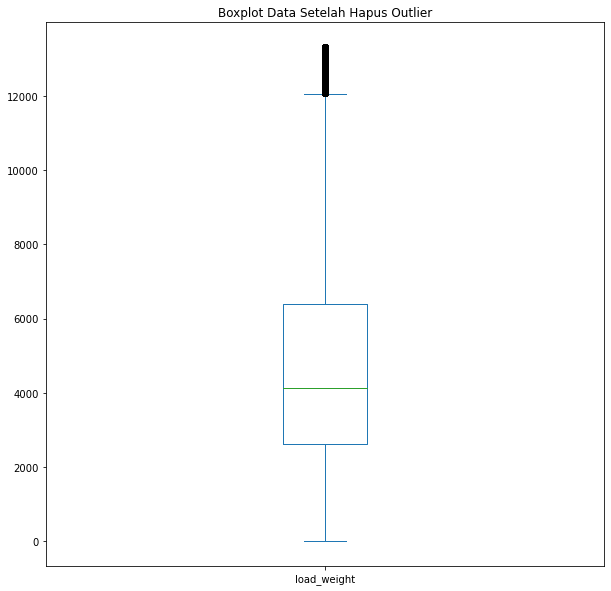

In [22]:
hapus_outier(data_lw_mrf)

Dari Hasil perhitungan EVA masih terdapat data outlier, maka dari itu lakukan kembali sampai dengan tidk ada data yang berada diluar batas (sampai data outlier menjadi tidak ada)

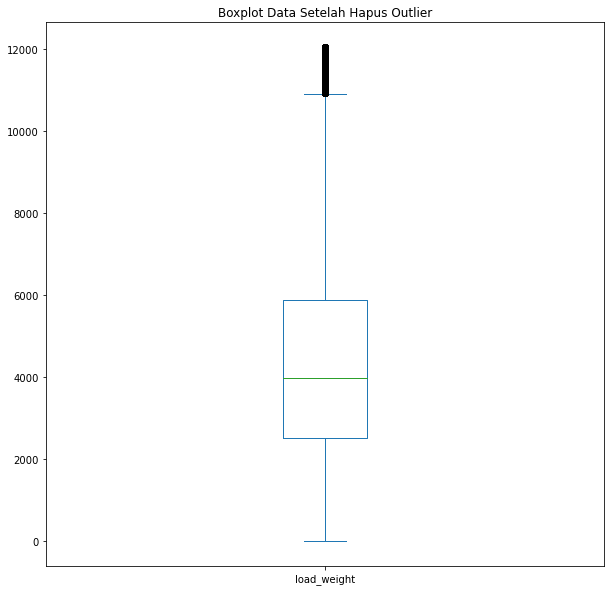

In [23]:
hapus_outier(data_lw_mrf)

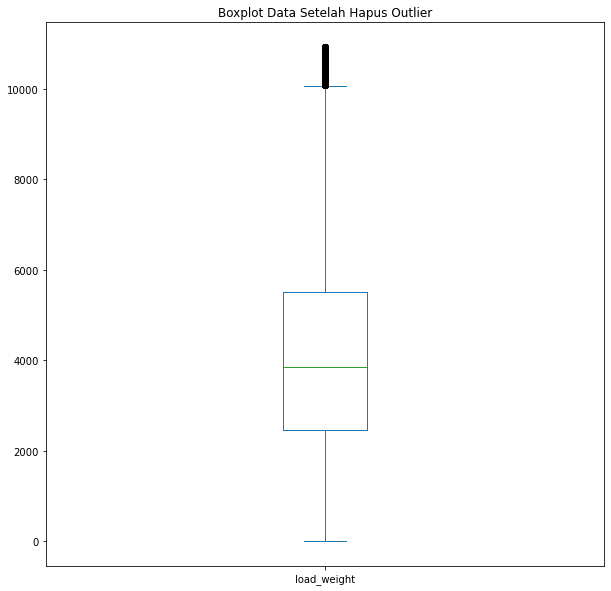

In [24]:
hapus_outier(data_lw_mrf)

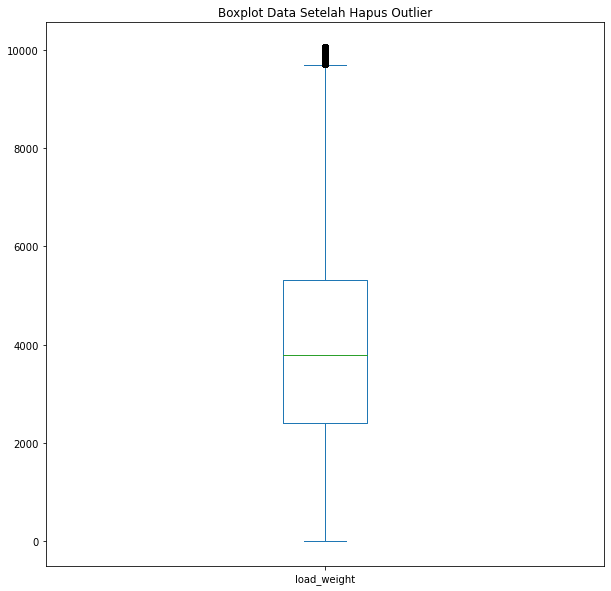

In [25]:
hapus_outier(data_lw_mrf)

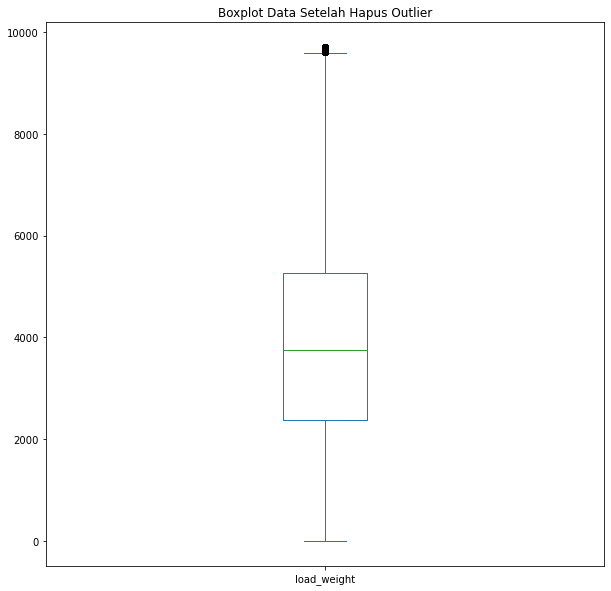

In [26]:
hapus_outier(data_lw_mrf)

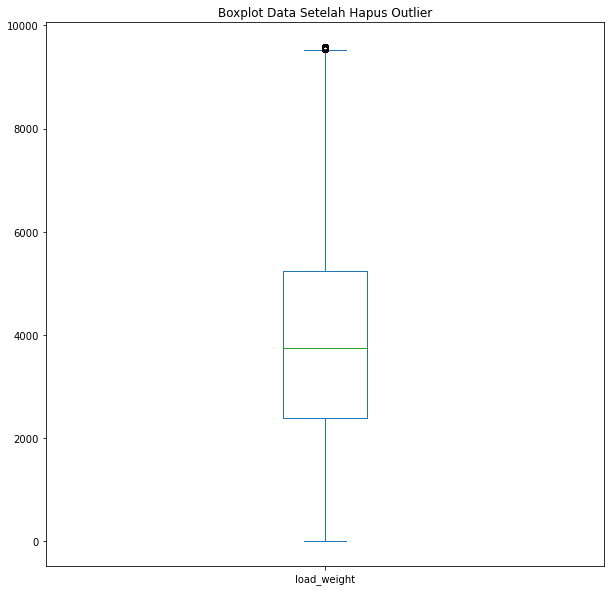

In [27]:
hapus_outier(data_lw_mrf)

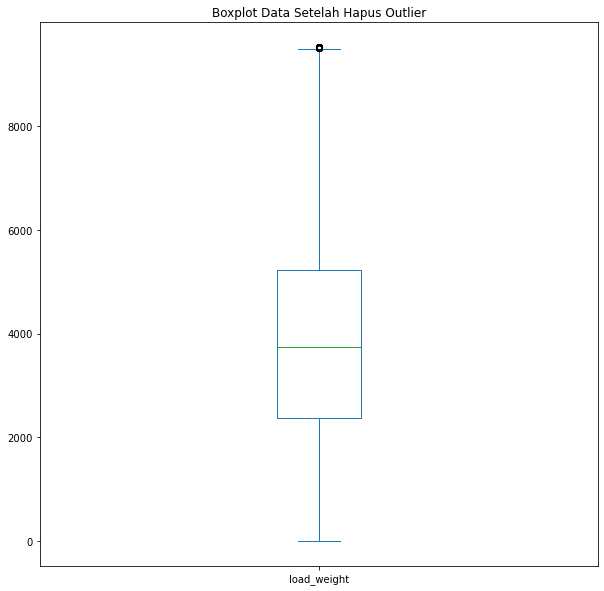

In [28]:
hapus_outier(data_lw_mrf)

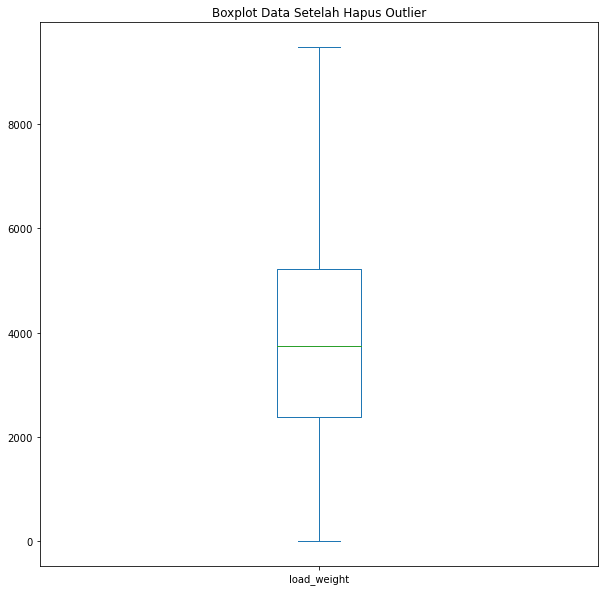

In [29]:
hapus_outier(data_lw_mrf)

Sekarang untuk data load weight drop off site MRF sudah tidak ada lagi data outlier. Kita lakukan hal yang sama juga kepada data load weight drop off site TDS - MRF.

<AxesSubplot:title={'center':'Box plot Data TDS - MRF'}>

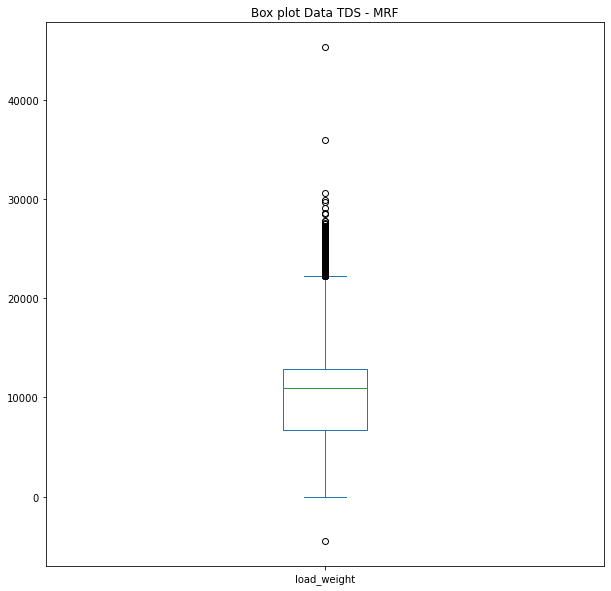

In [30]:
plt.figure(figsize=(10,10))
data_lw_tds_mrf.plot(kind="box",title="Box plot Data TDS - MRF")

Berdasarkan grafik box plot diatas terdapat data yang diluar outlier yang ditunjukan oleh lingkaran yang berada diluar batas garis batas boxplot. Hal tersebut menunjukan bahwa data yang berada diluar outlier berada jauh dari nilai rata-rata dan nilai median dari data tersebut. Maka dari itu kita akan menghapus data tersebut.
Dikarenakan data yang berada diluar outlier tersebut sangat banyak, maka kita akan menggunakan perhitungan Extreme Value Analysis.

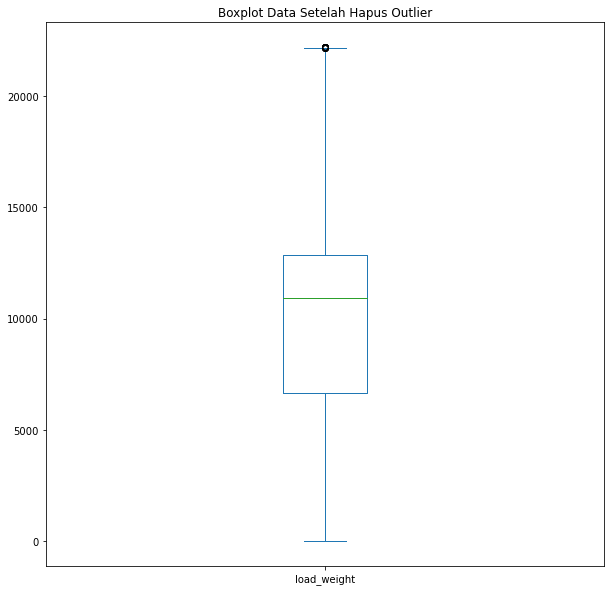

In [31]:
hapus_outier(data_lw_tds_mrf)

Dari Hasil perhitungan EVA masih terdapat data outlier, maka dari itu lakukan kembali sampai dengan tidk ada data yang berada diluar batas (sampai data outlier menjadi tidak ada)

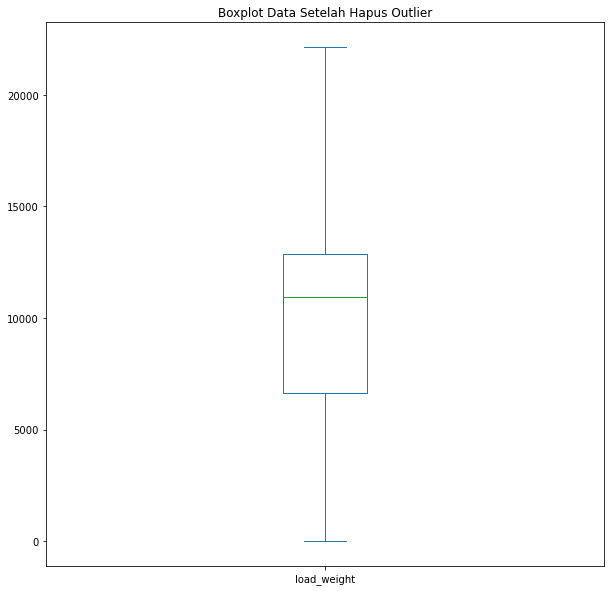

In [32]:
hapus_outier(data_lw_tds_mrf)

Sekarang untuk data load weight drop off site TDS - MRF sudah tidak ada lagi data outlier.

Mari kita analisis Central of Tendency sebelum dan sesdah dilakukannya pembersihan data outliers.

In [33]:
def CT_baru(f):
    print("Jumlah data setelah pengurangan data outlier adalah:",f.count())
    print("Nilai dari rata-rata yang baru adalah:",f.mean())
    print("Nilai dari median yang baru adalah:",f.median())
    print("Nilai dari modus yang baru adalah:",f.mode()[0])

In [34]:
CT_baru(data_lw_mrf)

Jumlah data setelah pengurangan data outlier adalah: 74821
Nilai dari rata-rata yang baru adalah: 3940.5568891086727
Nilai dari median yang baru adalah: 3740.0
Nilai dari modus yang baru adalah: 3460.0


Perbandingan central of tendency data load weight di drop off site MRF sebagai berikut:
- Jumlah data load weight pada dropoff site MRF sebelum adalah: 89625 data
- Jumlah data load weight pada dropoff site MRF setelah adalah: 74821 data
- Nilai dari rata-rata dari drop off site MRF sebelum adalah: 5305.141835425384
- Nilai dari rata-rata dari drop off site MRF setelah adalah: 3940.5568891086727
- Nilai dari median dari drop off site MRF sebelum adalah: 4260.0
- Nilai dari median dari drop off site MRF setelah adalah: 3740.0
- Nilai dari modus dari drop off site MRF sebelum adalah: 3460.0
- Nilai dari modus dari drop off site MRF setelah adalah: 3460.0

Terdapat penurunan pada jumlah data, rata-rata dan median dikarenakan penghapusan data outliner, sedangkan untuk nilai modus tetap tidak berubah. Penurunan jumlah data sebesar 16.5%, penurunan rata-rata sebesar 25.7% dan penurunan median sebesar 12.2%.

In [35]:
CT_baru(data_lw_tds_mrf)

Jumlah data setelah pengurangan data outlier adalah: 53740
Nilai dari rata-rata yang baru adalah: 10039.086378861184
Nilai dari median yang baru adalah: 10920.0
Nilai dari modus yang baru adalah: 12300.0


Perbandingan central of tendency data load weight di drop off site TDS - MRF sebagai berikut:
- Jumlah data load weight pada dropoff site TDS - MRF sebelum adalah: 54037 data
- Jumlah data load weight pada dropoff site TDS - MRF setelah adalah: 53740 data
- Nilai dari rata-rata dari drop off site TDS - MRF sebelum adalah: 10116.689435016748
- Nilai dari rata-rata dari drop off site TDS - MRF setelah adalah: 10039.086378861184
- Nilai dari median dari drop off site TDS - MRF sebelum adalah: 10960.0
- Nilai dari median dari drop off site TDS - MRF setelah adalah: 10920.0
- Nilai dari modus dari drop off site TDS - MRF sebelum adalah: 12300.0
- Nilai dari modus dari drop off site TDS - MRF setelah adalah: 12300.0

Terdapat penurunan pada jumlah data dan rata-rata dikarenakan penghapusan data outliner, sedangkan untuk nilai median dan modus tetap tidak berubah. Penurunan jumlah data sebesar 0.55%, penurunan rata-rata sebesar 0.77%.

6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [36]:
def variansi_data(g):
    print("Nilai minimum data:",g.min())
    print("Nilai maximum data:",g.max())
    print("Nilai range data:",g.max() - g.min())
    print("Nilai standar deviasi data:",g.std())
    print("Nilai dari variansi data:",g.var())

In [37]:
variansi_data(data_lw_mrf)

Nilai minimum data: 0.0
Nilai maximum data: 9480.0
Nilai range data: 9480.0
Nilai standar deviasi data: 2099.5480807287663
Nilai dari variansi data: 4408102.143291847


Berdasarkan data diatas, kita mendapat informasi bahwa range, standar deviasi dan varansi dari data load weight drop off site MRF adalah 9480, 2099.5480807287663 dan 4408102.143291847. Hal yang kita dapat dari data tersebut adalah bahwa drop off sampah pada site MRF berada di range 9480 dengan rentang 2099.5480807287663. Maksud dari hal tersebut adalah bahwa jumlah sampah yang di drop off site MRF berada di sekitar (9480 - 2099.5480807287663) dan (9480 + 2099.5480807287663)

In [38]:
variansi_data(data_lw_tds_mrf)

Nilai minimum data: 0.0
Nilai maximum data: 22140.0
Nilai range data: 22140.0
Nilai standar deviasi data: 4282.098008467237
Nilai dari variansi data: 18336363.354119077


Berdasarkan data diatas, kita mendapat informasi bahwa range, standar deviasi dan varansi dari data load weight drop off site MRF adalah 22140.0, 4282.098008467237 dan 18360370.914560582. Hal yang kita dapat dari data tersebut adalah bahwa drop off sampah pada site MRF berada di range 22140.0 dengan rentang 4282.098008467237. Maksud dari hal tersebut adalah bahwa jumlah sampah yang di drop off site MRF berada di sekitar (22140.0 - 4282.098008467237) dan (22140.0 + 4282.098008467237)

7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

- Jika pemerintah ingin menambah site baru, maka kapasitas site tersebut dapat ditentukan dari nilai rata-rata dan standar 
deviasi dari load weight secara keseluruhan. Hal ini dikarenakan nilai rata-rata dan standar deviasi memiliki arti bahwa load 
weight sampah berkisar di nilai tersebut, sehingga kapasitas penampungan site sampah yang baru harus berkisar dari nilai 
rata-rata dan standar deviasi dari load weight data keseluruhan.

- Saran untuk pemerintah adalah tidak perlu menambah site dikarenakan terdapat ke-tidak-rataan drop off sampah yang terjadi 
di kota Austin, seperti pada site WILCAB, ELMONT, KRAMER dan CLARKSON terjadi kekosongan sampah. Maka pemerintah perlu 
melakukan pemerataan drop off sampah agar sampah di kota Austin menjadi tertampung dengan baik.

8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

Disini kita akan menguji apakah nilai rata-rata populasi dari drop off site MRF sama dengan drop off site TDS - MRF. Pemerintah percaya bahwa setiap drop off site memiliki nilai rata-rata load weight yang sama, tetapi berdasarkan data yang diperoleh, nilai rata-rata untuk drop off site itu berbeda. Dalam kasus ini kita gunakan drop off site MRF dan TDS - MRF sebagai drop off site acuan.

Dalam kasus ini, hipotesis tersebut dinotasikan menjadi:

**H0: μ MRF = μ TDS - MRF**

**H1: μ MRF != μ TDS - MRF**

In [39]:
rata2_mrf = data_lw_mrf.mean()
std_mrf = data_lw_mrf.std()
rata2_tds_mrf = data_lw_tds_mrf.mean()
std_tds_mrf = data_lw_tds_mrf.std()
alfa = 0.05
t_hitung,nilai_p = stats.ttest_ind(data_lw_mrf,data_lw_tds_mrf)
print("Nilia dari rata-rata load weight MRF adalah:",rata2_mrf)
print("Nilai dari standar deviasi load weight MRF adalah:",std_mrf)
print("Nilai dari rata-rata load weight TDS - MRF adalah:",rata2_tds_mrf)
print("Nilai dari standar deviasi dari load weight TDS - MRF adalah:",std_tds_mrf)
print("Nilai alfa yang digunakan adalah:",alfa)
print("Nilai dari P adalah:",nilai_p)
print("Nilai dari t hitung adalah:",t_hitung)

Nilia dari rata-rata load weight MRF adalah: 3940.5568891086727
Nilai dari standar deviasi load weight MRF adalah: 2099.5480807287663
Nilai dari rata-rata load weight TDS - MRF adalah: 10039.086378861184
Nilai dari standar deviasi dari load weight TDS - MRF adalah: 4282.098008467237
Nilai alfa yang digunakan adalah: 0.05
Nilai dari P adalah: 0.0
Nilai dari t hitung adalah: -337.20014340493174


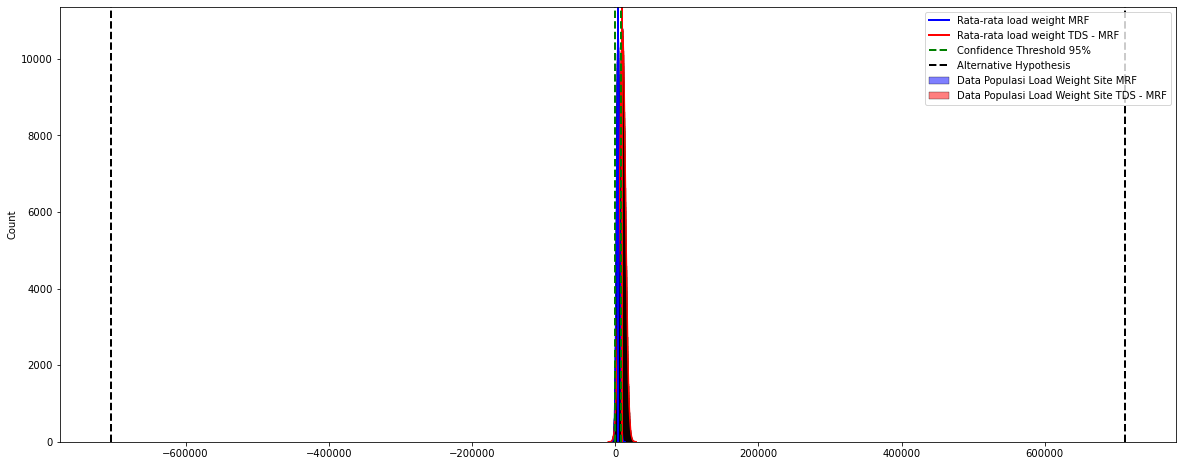

In [40]:
data_lw_mrf_pop = np.random.normal(rata2_mrf,std_mrf,1000000)
data_lw_tds_mrf_pop = np.random.normal(rata2_tds_mrf,std_tds_mrf,1000000)
rata2_mrf_pop = data_lw_mrf_pop.mean()
std_mrf_pop = data_lw_mrf_pop.std()
nilai_ci = stats.norm.interval(0.95,rata2_mrf,std_mrf)

plt.figure(figsize=(20,8))
sns.histplot(data_lw_mrf_pop,kde=True,label="Data Populasi Load Weight Site MRF",color="blue")
sns.histplot(data_lw_tds_mrf_pop,kde=True,label="Data Populasi Load Weight Site TDS - MRF",color="red")
plt.axvline(rata2_mrf,color="blue",linewidth=2,label="Rata-rata load weight MRF")
plt.axvline(rata2_tds_mrf,color="red",linewidth=2,label="Rata-rata load weight TDS - MRF")
plt.axvline(nilai_ci[1],color="green",linestyle="dashed",linewidth=2,label="Confidence Threshold 95%")
plt.axvline(nilai_ci[0],color="green",linestyle="dashed",linewidth=2)
plt.axvline(rata2_mrf_pop+t_hitung*std_mrf_pop,color="black",linestyle="dashed",linewidth=2,label="Alternative Hypothesis")
plt.axvline(rata2_mrf_pop-t_hitung*std_mrf_pop,color="black",linestyle="dashed",linewidth=2)
plt.legend()
plt.show()

Berdasarkan grafik tersebut terlihat bahwa garis hitam berada diluar area garis hijau, yang dimana hal tersebut berarti bahwa rata-rata load weight drop off site MRF tidak sama dengan rata-rata drop off site TDS - MRF.

Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!

Kesimpulan yang bisa diambil dari proses data ini adalah : 
- Nilai dari rata-rata load weight setiap drop off site berbeda-beda, dengan penyebaran data yang tidak merata yang ditujukan oleh nilai rata-rata yang  berbeda dan grafik yang tidak berdistribusi normal.
- Terdapat drop off site yang tidak terisi oleh load weight sampah, sehingga memunculkan kesenjangan load weight di setiap drop off site.
- Diperlukan pendataan lebih lanjut dikarenakan terdapat nilai yang tidak ada pada load weight di beberapa drop off site.
- Pemerintah tidak perlu menambah drop off site, hanya pemerintah perlu melakukan pemerataan drop load weight di setiap drop off site dengan merata.

Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Apa perbedaan statistik deskriptif dan inferensial?
- Statistika deskriptif adalah metode-metode yang berkaitan dengan pengumpulan dan penyajian suatu data sehingga memberikan informasi yang berguna. Sedangkan statistika inferensial merupakan metode-metode ayng digunakan dari data sampel dengan tujuan untuk mengambil kesimpulan dan memprediksi hal yang akan datang.
2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?
- Metrik central tendency yang digunakan untuk data yang terdistribusi normal maupun tidak it sama, dikarenakan central tendency merupakan nilai yang menunjukan letak data dan dapat digunakan oleh semua jenis data.
3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
- Teknik yang digunakan dalam handling outlier dalam kasus ini menggunakan Extreme Value Analysist (EVA) dikarenakan jenis data dalam kasus ini tidak berdistribusi normal.
4. Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
- Central tendency merupakan nilai yang menunjukan letak data dan dapat digunakan oleh semua jenis data. Nilai dari central tendency dapat digunakan untuk menentukan karakteristik dari data tersebut sehingga kita dapat memprediksi langkah kedepan yang diambil berdasarkan nilai central of tendency.
5. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
- Uji hipotesis yang dilakukan pada kasus ini adalah uji hipotesis two sample with two tail dikarenakan kita ingin mencari nilai kesamaan rata-rata dalan setiap drop off site apakah sama atau tidak, sehingga kita dapat memprediksi apakah data tersebut memiliki rata-rata yang sama dalam arti karaktersitik dari data tersebut sama atau tidak. Penentuan tersebut dapat digunakan untuk memprediksi apakah perlu dilakukan penambahan site atau perlu diberlakukannya perlakuan khusus untuk setiap site.